# HW_08

## Question 2:

#### 1. Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined.

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Real-World Application: A factory produces electronic components that are either functional or defective. An automated system tests each component to classify it accordingly. 

#### 2. Sensitivity measures the proportion of actual positives that are correctly identified. (True Positive Rate)

$$Sensitivity = \frac{TP}{TP+FN}$$

Real-World Application: A public health initiative uses a medical test to screen for a contagious disease in a population.

#### 3. Specificity measures the proportion of actual negatives that are correctly identified. (True Negative Rate)

$$Sensitivity = \frac{TN}{TN+FP}$$

Real-World Application: An employer conducts drug tests to ensure employees are not using prohibited substances.

#### 4. Precision measures the proportion of positive identifications that were actually correct. (Positive Predictive Value)

$$Precision = \frac{TP}{TP+FP}$$

Real-World Application: An email service uses a spam filter to classify incoming emails as "spam" or "not spam."

## Question 3:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 3: Set 'Pub year' and 'NumPages' to type int using .loc[]
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Step 4: Set 'Hard_or_Paper' to type category using .loc[]
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Now, 'ab_reduced_noNaN' is the pre-processed dataset
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [2]:
ab_reduced_noNaN['Hard_or_Paper'].value_counts()

Hard_or_Paper
P    233
H     86
Name: count, dtype: int64

In [3]:
ab_reduced_noNaN['Pub year'].value_counts()

Pub year
2011.0    52
2010.0    39
2009.0    20
2006.0    18
2004.0    16
2008.0    15
1999.0    13
2003.0    13
2002.0    12
2005.0    12
2007.0    12
1993.0     9
2001.0     9
1995.0     8
2000.0     7
1996.0     7
1998.0     7
1989.0     6
1997.0     6
1990.0     5
1994.0     5
1991.0     4
1992.0     4
1987.0     3
1964.0     2
1963.0     2
1988.0     2
1982.0     2
1979.0     1
1985.0     1
1976.0     1
1957.0     1
1965.0     1
1955.0     1
1967.0     1
1959.0     1
1936.0     1
Name: count, dtype: int64

In [4]:
average_pages = ab_reduced_noNaN.groupby('Hard_or_Paper')['NumPages'].mean()
print(average_pages)

Hard_or_Paper
H    338.069767
P    332.871245
Name: NumPages, dtype: float64


After proceesing the pre-processing steps, the data has no missing values and the data types have been correctly assigned.

The data totaled 319 books. Overall, there are almost three times more hardcovers than softcovers, but the averages for the number of pages in hardcovers and softcovers are relatively balanced. This may be due to the fact that there is a diversity of demand for different types of books in the market, and that hardcovers are not always thick, long works, but rather adapt to the needs of different groups of readers.

I also found that most of the books were published in years clustered between 2002 and 2011, with the number of publications showing a sharp increase in 2010 and 2011 in particular, far outstripping previous years. This may reflect a boom in book publishing, and the rise in the number of publications may be related to the rise of the self-publishing trend.

However, the preprocessing of the data ensures that the dataset is clean and finished, making the need to use the complete data a great help. In addition, through EDA, we can get a good overview of the dataset.

## Question 4:

In [5]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

The purpose of y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] is it converts the categorical variable Hard_or_Paper into a binary numerical variable suitable for classification (1 or 0).

X = ab_reduced_noNaN[['List Price']] selects the List Price column from the dataset as the feature for the model.

Basically the two code provides more accurate data, removes other data that is not used or is not useful, and makes the model more accurate.

Number of observations in the training set: 255
Number of observations in the test set: 64
Classes: ['H' 'P']


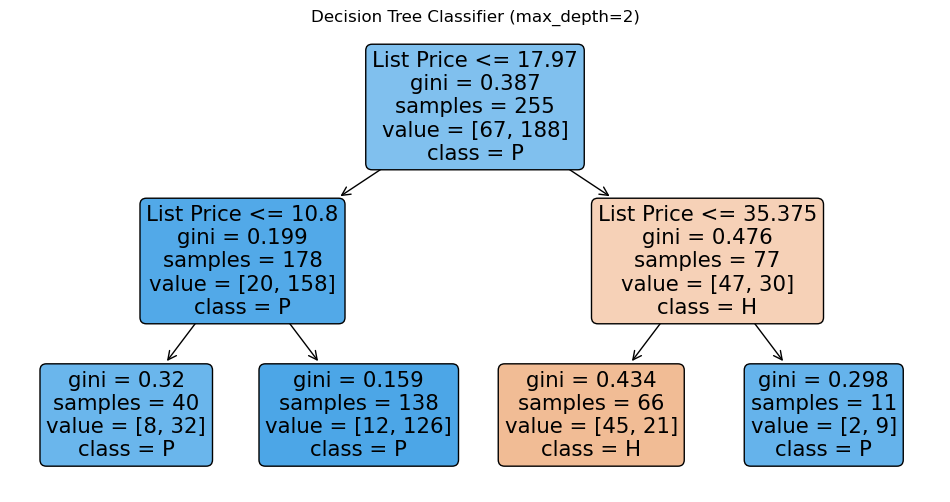

Accuracy on training set: 0.83
Accuracy on test set: 0.88


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz

# Read and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries and create a copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Set a random seed and split the dataset
np.random.seed(130)

# Create training and testing indices
training_indices = ab_reduced_noNaN.sample(frac=0.8, replace=False).index.sort_values()
testing_indices = ab_reduced_noNaN.index[~ab_reduced_noNaN.index.isin(training_indices)]

# Create training and testing datasets
ab_reduced_noNaN_train = ab_reduced_noNaN.loc[training_indices]
ab_reduced_noNaN_test = ab_reduced_noNaN.loc[testing_indices]

# Report the number of observations
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

# Prepare the outcome variable and feature matrix
le = LabelEncoder()
le.fit(ab_reduced_noNaN['Hard_or_Paper'])

# Outcome variable (y) and feature matrix (X) for training
y_train = le.transform(ab_reduced_noNaN_train['Hard_or_Paper'])
X_train = ab_reduced_noNaN_train[['List Price']]

# Outcome variable and feature matrix for testing
y_test = le.transform(ab_reduced_noNaN_test['Hard_or_Paper'])
X_test = ab_reduced_noNaN_test[['List Price']]

# Check the classes
print("Classes:", le.classes_)

# Initialize and train the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=130)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['List Price'],
    class_names=le.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Alternatively, plot using matplotlib
plt.figure(figsize=(12, 6))
tree.plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=le.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classifier (max_depth=2)")
plt.show()

# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.2f}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.2f}")


The initial categorization is that prices less than or equal to 17.97 will be categorized on the left, while those greater than will be categorized on the right. Then further classification is done based on price until finally a rough classification is obtained and the accuracy of the model is 83% on the training set and 88% on the test set.

According to the model we can see that it has been possible to classify most of the books still successfully, even though there are still hardcover and softcover books mixed together in each branch. We can increase the depth of the model to make more classifications, in order to achieve the goal of completely classifying hardback and softback books. However, setting the depth to a very large number may also cause the model to overfit. The model will then overfit the training data, making it difficult to generalize to new data, reducing the accuracy of the predictions and the robustness of the model.

## Question 5:

In [10]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

Number of observations in the training set: 255
Number of observations in the test set: 64
Classes: ['H' 'P']


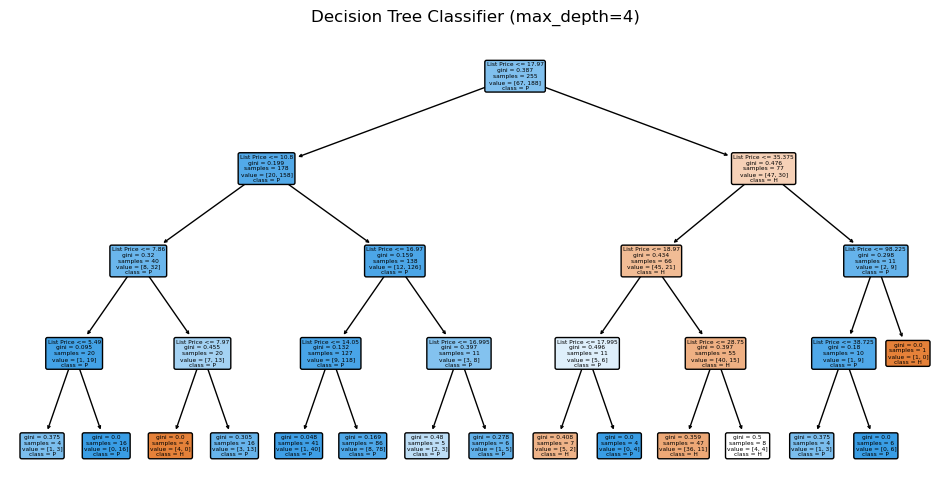

Accuracy on training set: 0.87
Accuracy on test set: 0.83


In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz

# Read and preprocess the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries and create a copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Set a random seed and split the dataset
np.random.seed(130)

# Create training and testing indices
training_indices = ab_reduced_noNaN.sample(frac=0.8, replace=False).index.sort_values()
testing_indices = ab_reduced_noNaN.index[~ab_reduced_noNaN.index.isin(training_indices)]

# Create training and testing datasets
ab_reduced_noNaN_train = ab_reduced_noNaN.loc[training_indices]
ab_reduced_noNaN_test = ab_reduced_noNaN.loc[testing_indices]

# Report the number of observations
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

# Prepare the outcome variable and feature matrix
le = LabelEncoder()
le.fit(ab_reduced_noNaN['Hard_or_Paper'])

# Outcome variable (y) and feature matrix (X) for training
y_train = le.transform(ab_reduced_noNaN_train['Hard_or_Paper'])
X_train = ab_reduced_noNaN_train[['List Price']]

# Outcome variable and feature matrix for testing
y_test = le.transform(ab_reduced_noNaN_test['Hard_or_Paper'])
X_test = ab_reduced_noNaN_test[['List Price']]

# Check the classes
print("Classes:", le.classes_)

# Initialize and train the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=130)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['List Price'],
    class_names=le.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Alternatively, plot using matplotlib
plt.figure(figsize=(12, 6))
tree.plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=le.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classifier (max_depth=4)")
plt.show()

# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.2f}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.2f}")

Same as before, except that this time the model will categorize hard cover books and paper back books based on three metrics: 'NumPages', 'Thick', and 'List Price'.
In addition, due to the increase in depth, the model will go further to classify hard cover books and paper back books in a more narrow range.

## Question 6:

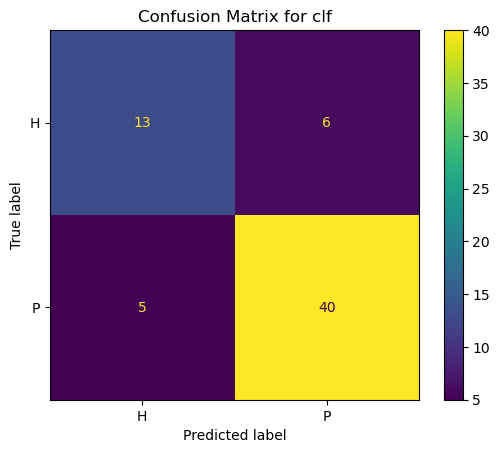

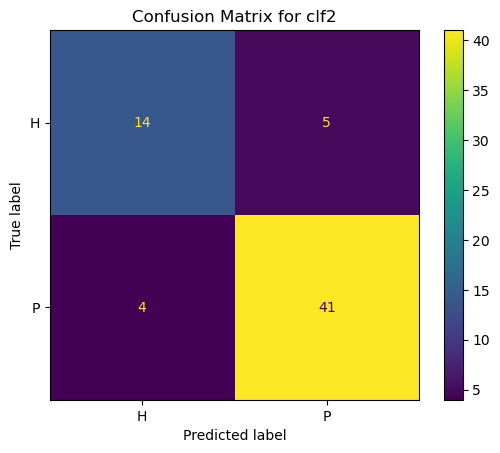

In [17]:
# Outcome variable (same as before)
y_train = le.transform(ab_reduced_noNaN_train['Hard_or_Paper'])
y_test = le.transform(ab_reduced_noNaN_test['Hard_or_Paper'])

# Feature matrix with additional features
X_train2 = ab_reduced_noNaN_train[['List Price', 'NumPages', 'Pub year']]
X_test2 = ab_reduced_noNaN_test[['List Price', 'NumPages', 'Pub year']]

# Initialize and train the second Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=130)
clf2.fit(X_train2, y_train)

# Make predictions on the training set
y_train_pred2 = clf2.predict(X_train2)

# Make predictions on the test set
y_test_pred2 = clf2.predict(X_test2)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_test_pred)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=le.classes_)
disp_clf.plot()
plt.title("Confusion Matrix for clf")
plt.show()

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_test_pred2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=le.classes_)
disp_clf2.plot()
plt.title("Confusion Matrix for clf2")
plt.show()

In [18]:
# Extract values from confusion matrix
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()

# Calculate metrics
accuracy_clf = (tp_clf + tn_clf) / (tp_clf + tn_clf + fp_clf + fn_clf)
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)

print("Metrics for clf:")
print(f"Accuracy: {accuracy_clf:.2f}")
print(f"Sensitivity (Recall): {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")


Metrics for clf:
Accuracy: 0.83
Sensitivity (Recall): 0.89
Specificity: 0.68


In [16]:
# Extract values from confusion matrix
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

# Calculate metrics
accuracy_clf2 = (tp_clf2 + tn_clf2) / (tp_clf2 + tn_clf2 + fp_clf2 + fn_clf2)
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)

print("\nMetrics for clf2:")
print(f"Accuracy: {accuracy_clf2:.2f}")
print(f"Sensitivity (Recall): {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")


Metrics for clf2:
Accuracy: 0.86
Sensitivity (Recall): 0.91
Specificity: 0.74


Recall on the equations of accuracy, sensitivity and specificity.

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

$$Sensitivity = \frac{TP}{TP+FN}$$

$$Sensitivity = \frac{TN}{TN+FP}$$

In this case, accuracy tested how well the model in categorizing 'hardcover' and 'softcover' books. High sensitivity means the model is good at identifying positive cases ('Hardcover' books). High specificity means the model is good at identifying negative cases ('Paperback' books).

## Question 7:

Class mapping:
0: H
1: P


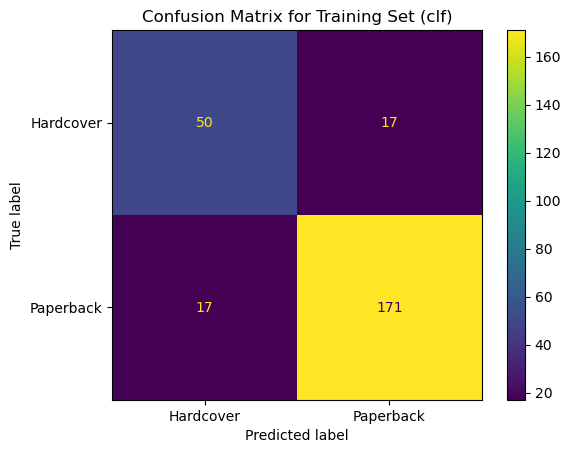

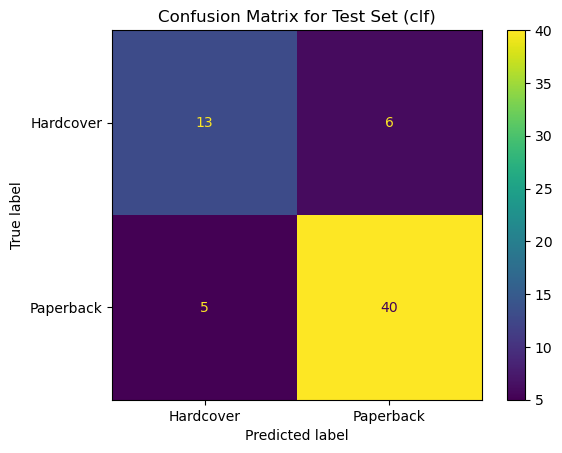

In [20]:
# Assuming previous imports and data preparation steps

# Verify class mapping
print("Class mapping:")
for index, class_name in enumerate(le.classes_):
    print(f"{index}: {class_name}")

# Plot confusion matrix for training set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, clf.predict(X_train), labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Hardcover", "Paperback"])
disp_train.plot()
plt.title("Confusion Matrix for Training Set (clf)")
plt.show()

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, clf.predict(X_test), labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Hardcover", "Paperback"])
disp_test.plot()
plt.title("Confusion Matrix for Test Set (clf)")
plt.show()


The difference between the two confusion matrices below is very obvious when comparing the previous confusion matrices, which is mainly caused by the difference in the features used and the change in model complexity. The initial confusion matrices may come from models that use fewer features or have a simpler structure, and therefore less accurate predictions and higher misclassification rates. In contrast, for models clf and clf2, their confusion matrices perform better because these models incorporate more useful features and optimize the parameters.

## Question 8:

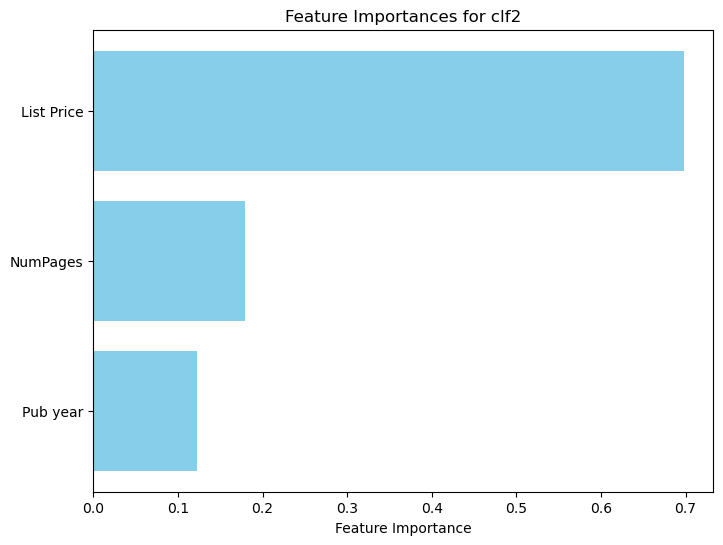

The most important feature is 'List Price' with an importance score of 0.698


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from clf2
importances = clf2.feature_importances_

# Get the feature names used in clf2
feature_names = clf2.feature_names_in_

# Create a DataFrame to hold feature names and their importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Report the most important feature
most_important_feature = feature_importances.iloc[0]
print(f"The most important feature is '{most_important_feature['Feature']}' with an importance score of {most_important_feature['Importance']:.3f}")

## Question 9:

In MLR, each coefficient directly indicates how it affects the model, making it easy to interpret. In decision trees, however, the importance of a feature is reflected through its relative contribution to the overall predictions, which makes it less straightforward to understand compared to MLR.

## Question 10:

Yes

## Chatbot link:

https://chatgpt.com/share/67404dba-31c8-8003-b501-dfb7ff8bb51b